In [134]:
from math import sqrt

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
plt.rc("font", size=10)

from openbb_terminal.sdk import openbb

In [135]:
# Code creates list of dow jones symbols
dji = (
    pd.read_html('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average')[1]
)
dji_symbols = dji.Symbol.tolist()
dji_symbols.remove('DOW')

dji_data = openbb.stocks.ca.hist(
    dji_symbols, 
    start_date="2016-01-01",
    end_date="2020-01-01"
)

In [136]:
# Code creates list of sp500 symbols
sp500 = (
    pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
)
sp500_symbols = sp500.Symbol.tolist()
sp500_symbols.remove('BRK.B')
sp500_symbols.remove('BF.B')
sp500_symbols.remove('CARR')
sp500_symbols.remove('CDAY')
sp500_symbols.remove('CEG')
sp500_symbols.remove('CTVA')
sp500_symbols.remove('DOW')
sp500_symbols.remove('FOXA')
sp500_symbols.remove('FOX')
sp500_symbols.remove('GEHC')
sp500_symbols.remove('MRNA')
sp500_symbols.remove('OGN')
sp500_symbols.remove('OTIS')
sp500_symbols.remove('ROP')

sp500_data = openbb.stocks.ca.hist(
    sp500_symbols, 
    start_date="2016-01-01",
    end_date="2020-01-01"
)

NaN values found in: FTV, HWM, IR, INVH, LW, SEDG, VICI.  Backfilling data

In [184]:
# Code creates list of sp100 symbols
sp100 = (
    pd.read_html('https://en.wikipedia.org/wiki/S%26P_100')[2]
)
sp100_symbols = sp100.Symbol.tolist()
sp100_symbols.remove('BRK.B')
sp100_symbols.remove('DOW')
sp100_symbols.append('CP')

sp100_data = openbb.stocks.ca.hist(
    sp100_symbols, 
    start_date="2016-01-01",
    end_date="2020-01-01"
)

In [119]:
print(sp100_data)

                   MMM        AOS         ABT        ABBV         ACN  \
Date                                                                    
2018-01-02  193.525909  55.568016   53.380817   75.740990  141.472946   
2018-01-03  193.517654  55.902176   53.498863   76.926262  142.125916   
2018-01-04  196.047241  56.164085   53.408062   76.487556  143.808792   
2018-01-05  197.574814  56.886562   53.562424   77.819054  144.995087   
2018-01-08  196.934204  57.157490   53.408062   76.572212  146.153778   
...                ...        ...         ...         ...         ...   
2022-12-23  116.794731  56.136066  106.645424  158.336090  263.014862   
2022-12-27  116.872505  56.895725  107.029884  158.229294  262.243896   
2022-12-28  114.996246  56.007812  106.300385  157.491486  260.079193   
2022-12-29  117.212761  56.885864  108.745193  157.811859  265.278442   
2022-12-30  116.580856  56.471500  108.232574  156.889603  263.756195   

                 ATVI        ADM        ADBE      

In [185]:
moments = (
    sp100_data
    .pct_change()
    .describe()
    .T[["mean", "std"]]
    .rename(columns={"mean": "returns", "std": "vol"})
) * [252, sqrt(252)]

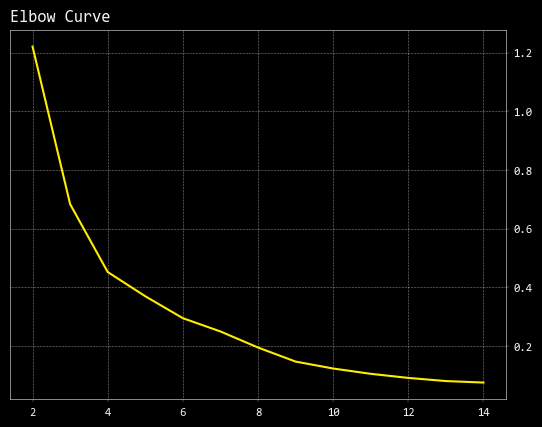

In [186]:
sse = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(moments)
    sse.append(kmeans.inertia_)

plt.plot(range(2, 15), sse)
plt.title("Elbow Curve");

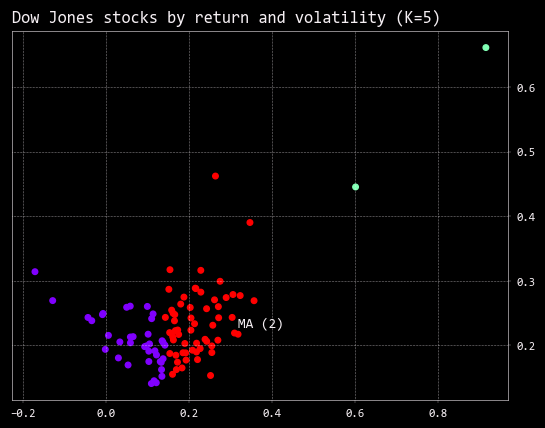

In [196]:
kmeans = KMeans(n_clusters=3, n_init=11).fit(moments)
plt.scatter(
    moments.returns, 
    moments.vol, 
    c=kmeans.labels_, 
    cmap="rainbow",
);

asset_groups = {
    0: [],
    1: [],
    2: [],
    3: [],
    4: [],
    5: [],
    6: [],
    7: [],
    8: [],
    9: [],
    10: [],
    11: [],
    12: [],
    13: [],
    14: [],
    15: [],
    16: [],
    17: [],
    18: [],
    19: [],
    20: []
}

plt.title("Dow Jones stocks by return and volatility (K=5)")
for i in range(len(moments.index)):
    if(moments.index[i] == "MA"):
        txt = f"{moments.index[i]} ({kmeans.labels_[i]})"
    else:
        txt = f""
    asset_groups[int(kmeans.labels_[i])].append(moments.index[i])
    xy = tuple(moments.iloc[i, :] + [0, 0.01])
    plt.annotate(txt, xy)
    

In [192]:
print(asset_groups[0])

['AAPL', 'ABBV', 'ABT', 'ACN', 'ADBE', 'AMGN', 'AMT', 'AMZN', 'AVGO', 'AXP', 'BA', 'BAC', 'BKNG', 'BLK', 'C', 'CAT', 'CHTR', 'CMCSA', 'COF', 'COP', 'COST', 'CRM', 'CSCO', 'DHR', 'EMR', 'EXC', 'GOOG', 'GOOGL', 'HD', 'HON', 'INTC', 'JPM', 'LIN', 'LLY', 'LMT', 'LOW', 'MA', 'MCD', 'META', 'MRK', 'MS', 'MSFT', 'NEE', 'NFLX', 'NKE', 'PG', 'PYPL', 'QCOM', 'RTX', 'SCHW', 'TGT', 'TMO', 'TMUS', 'TSLA', 'TXN', 'UNH', 'UNP', 'V', 'WMT', 'CP']
